In [1]:
import project_path

import pickle
import math
import numpy as np
from IPython.display import display, Markdown, Latex
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

from metrics import gaussian_metrics_names, multimodal_gaussian_metrics_names

sns.set()

In [2]:
def boxplot_metrics(df, metrics_names):
    models = df['Model'].unique().tolist()
    np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning) 
    for ds_name, df_ds in df.groupby('Dataset', sort=False):
        display(Markdown(f'### {ds_name}'))
        n_cols = 3
        n_rows = math.ceil(len(metrics_names) / n_cols)
        fig, axes = plt.subplots(n_rows, n_cols, squeeze=False, sharey=True, figsize=(n_cols * 4, n_rows * 2.5), dpi=200)
        for metric, axis in itertools.zip_longest(metrics_names, axes.flatten()):
            if metric is None:
                axis.set_visible(False)
            else:
                axis.set_title(metric, fontsize=14)
                if metric == 'PICP':
                    axis.axvline(x=0.95, linestyle='--')
                #df_ds.pivot(index='Run', columns='Model', values=metric).boxplot(vert=False, ax=axis)
                df2 = df_ds.pivot(index='Run', columns='Model', values=metric)
                df2 = df2[models[::-1]]
                df2.boxplot(vert=False, ax=axis)
                plt.setp(axis.get_xticklabels(), rotation=20, horizontalalignment='right')
        fig.tight_layout()
        plt.show()

### boston

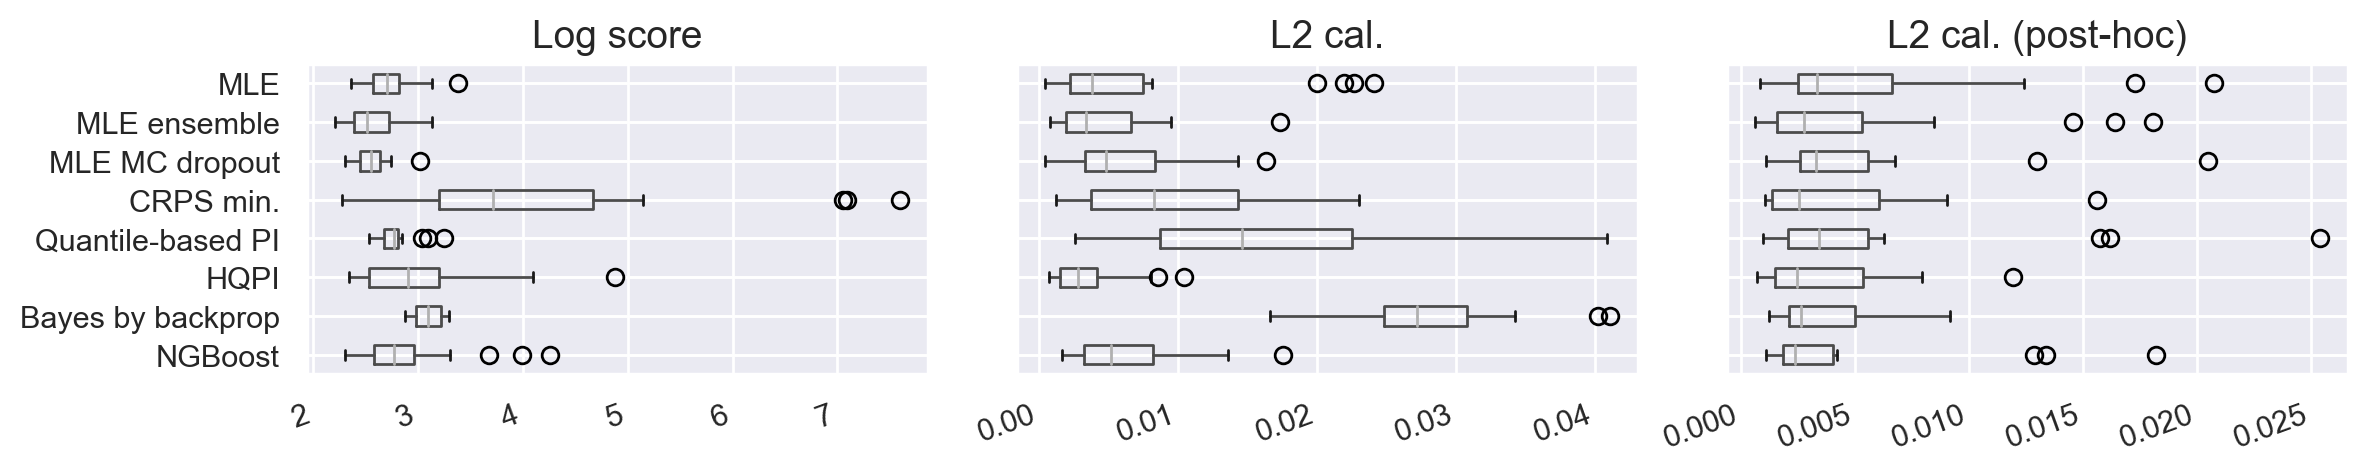

In [3]:
with open('../data_openml/saves/boston/gaussian_stats.pickle', 'rb') as f:
    stats_gaussian = pickle.load(f)
boxplot_metrics(stats_gaussian.build_df(), multimodal_gaussian_metrics_names)

### boston

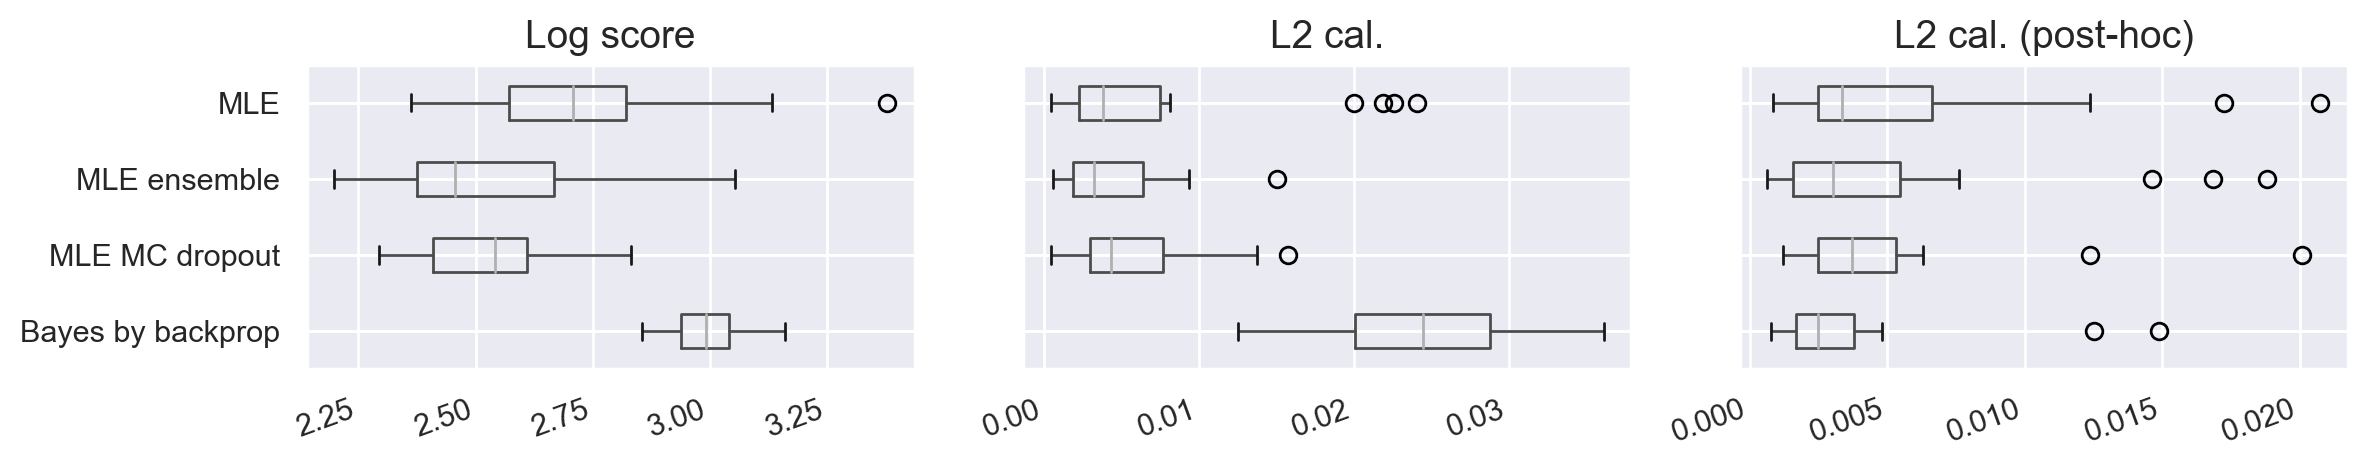

In [4]:
with open('../data_openml/saves/boston/multimodal_stats.pickle', 'rb') as f:
    stats_gaussian = pickle.load(f)
boxplot_metrics(stats_gaussian.build_df(), multimodal_gaussian_metrics_names)

### us_crime

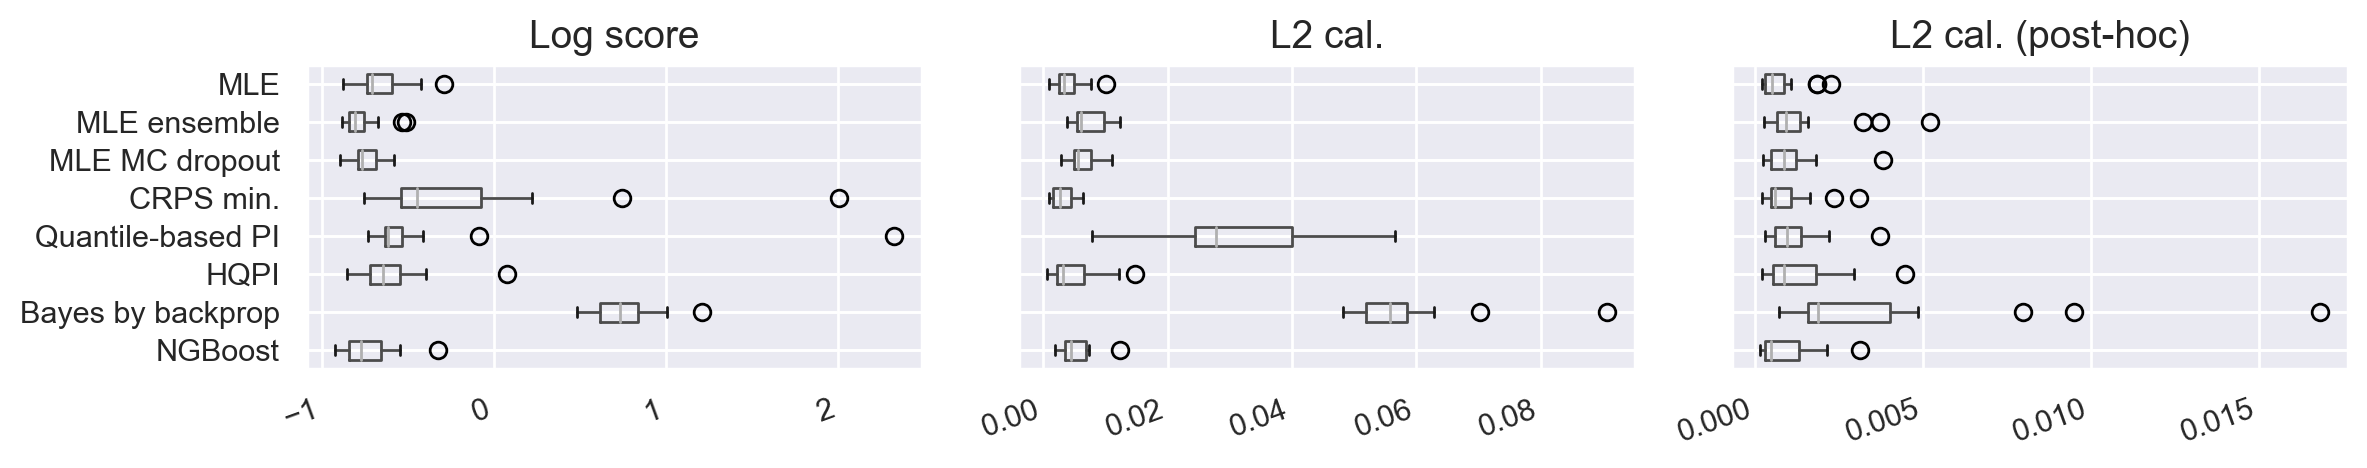

In [5]:
with open('../data_openml/saves/us_crime/gaussian_stats.pickle', 'rb') as f:
    stats_gaussian = pickle.load(f)
boxplot_metrics(stats_gaussian.build_df(), multimodal_gaussian_metrics_names)

### us_crime

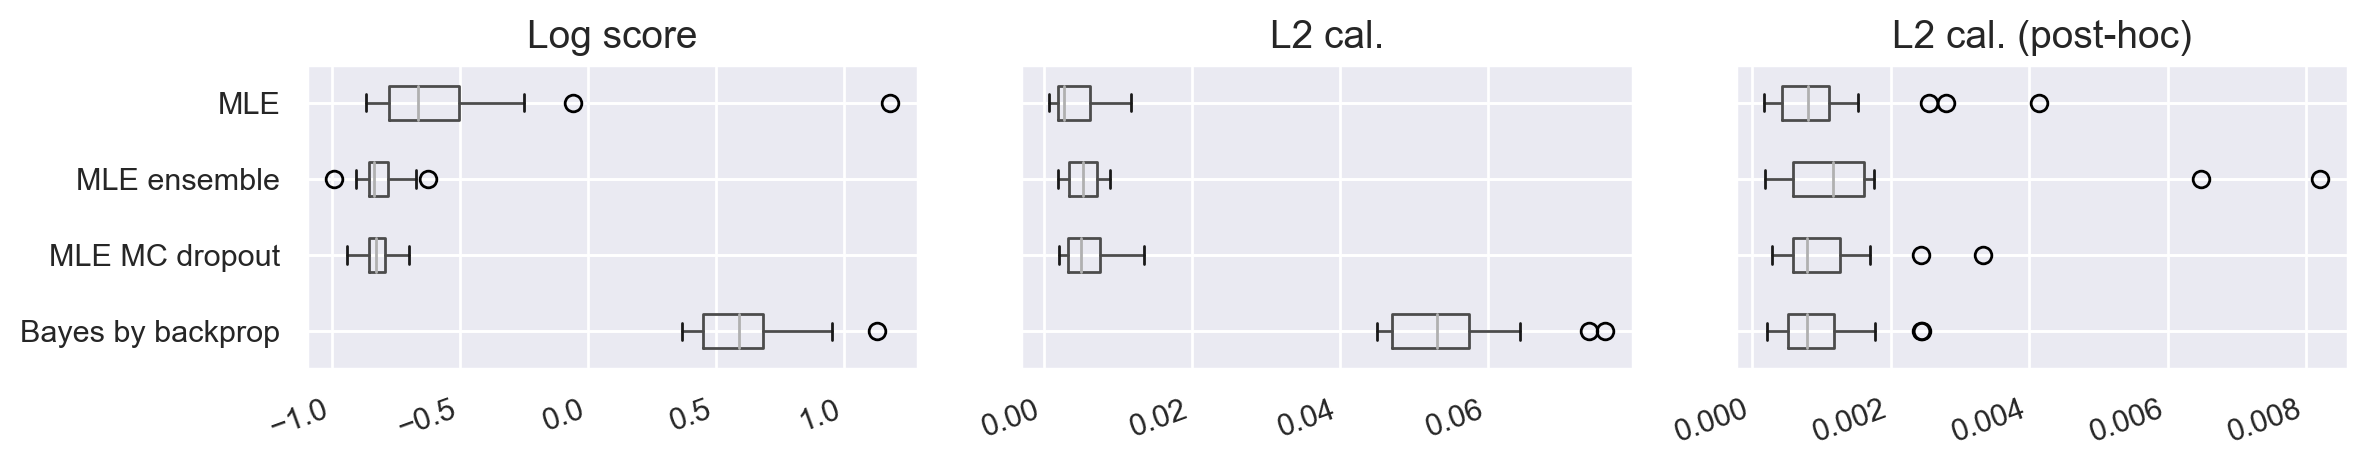

In [6]:
with open('../data_openml/saves/us_crime/multimodal_stats.pickle', 'rb') as f:
    stats_gaussian = pickle.load(f)
boxplot_metrics(stats_gaussian.build_df(), multimodal_gaussian_metrics_names)

### house_sales

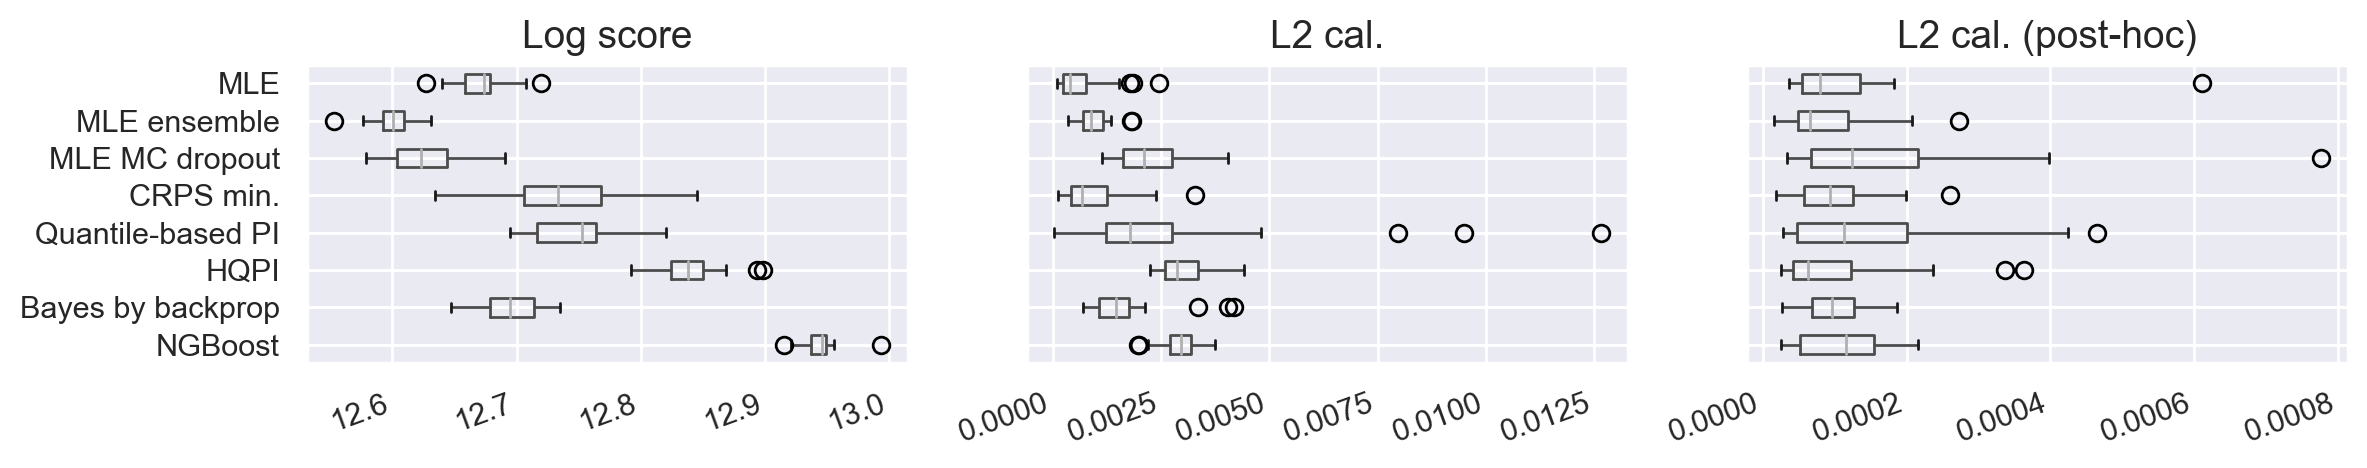

In [8]:
with open('../data_openml/saves/house_sales/gaussian_stats.pickle', 'rb') as f:
    stats_gaussian = pickle.load(f)
boxplot_metrics(stats_gaussian.build_df(), multimodal_gaussian_metrics_names)

### house_sales

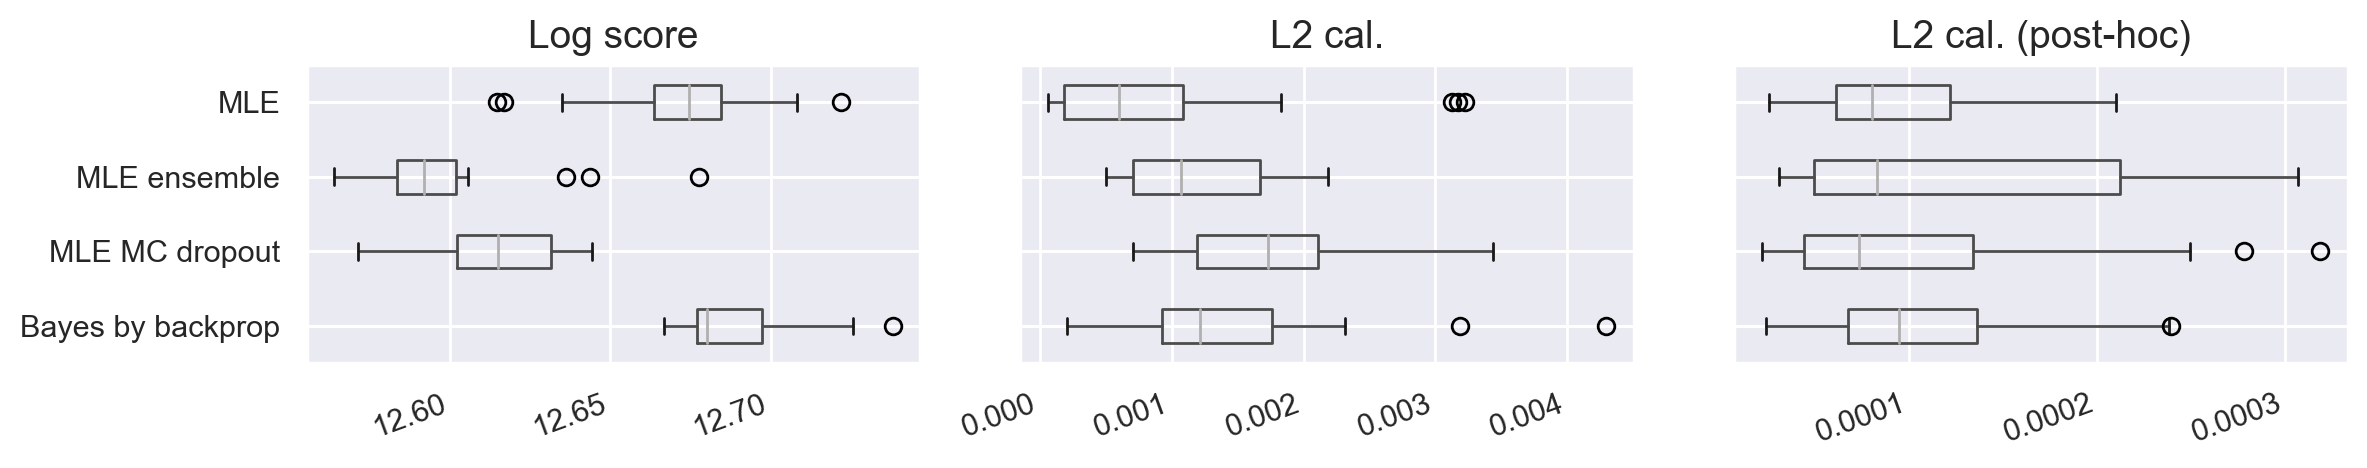

In [7]:
with open('../data_openml/saves/house_sales/multimodal_stats.pickle', 'rb') as f:
    stats_gaussian = pickle.load(f)
boxplot_metrics(stats_gaussian.build_df(), multimodal_gaussian_metrics_names)